In [13]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")


In [14]:
#Load cleaned dataset
df = pd.read_csv(os.path.join('data','titanic_cleaned.csv'))

X = df.drop('Survived',axis=1) #To use for prediction
Y = df['Survived'] #To predict

x_train, x_test, y_train,y_test = train_test_split(X, Y)

scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

### Evaluating using k-Nearest Neighbours

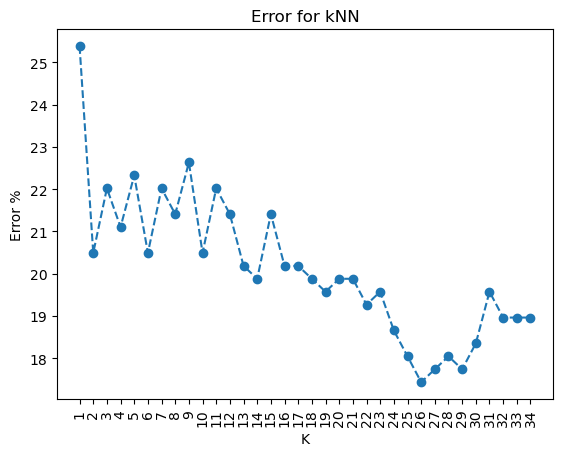

In [15]:
error = []
max_k = 35
for k in range(1, max_k):
    knn = KNeighborsClassifier(n_neighbors=k, algorithm='brute').fit(x_train, y_train)
    prediction = knn.predict(x_test)
    error.append(np.mean(prediction != y_test)*100)
    
plt.plot(range(1, max_k), error, linestyle='dashed', marker='o')


plt.title('Error for kNN')
plt.xlabel('K')
plt.ylabel('Error %')
plt.xticks(range(1, max_k))
plt.tick_params(axis ='x', rotation = 90)
plt.show()

In [16]:
i = min(range(len(error)), key=error.__getitem__)
print(f'Accuracy: {100-error[i].round(2)}%')

Accuracy: 82.57%


### Evaluating using XGBoost

In [17]:
xgboost = XGBClassifier().fit(x_train, y_train)

prediction = xgboost.predict(x_test)
accuracy = accuracy_score(y_test, prediction)

[14:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [18]:
print(f'Accuracy: {(accuracy*100).round(2)}%')

Accuracy: 79.82%
